# ASSIGNMENT 15 : LGBM & XGBM

#### Exploratory Data Analysis (EDA):

#### 1. Load the Titanic dataset using Python's pandas library.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\15. XGB & LGBM\Titanic_train.csv")
test = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\15. XGB & LGBM\Titanic_test.csv")
train.shape, test.shape

((891, 12), (418, 11))

In [8]:
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

We can see that our test data is missing target variable so we'll be just predicting the values after building the model.

In [11]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

#### 2. Check for missing values.

In [14]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can observe that
* Age column has a lot of null values but since age could be an important factor in our prediction of survivors so we'll avoid filling it with any mean value or removing the entire column, instead we'll just remove the rows.
* Cabin has a lot of null values in training and testing set so we'll be removing that column.
* Embarked has only 2 null values and since it's a categorical column we'll be filling it with mode value
* testing set fare value we'll fill with mean value.

#### 3. Explore data distributions using histograms and box plots.

In [18]:
#let's separate the object and numerical columns
obj = (train.dtypes == 'object')
obj_cols = list(obj[obj].index)
num = (train.dtypes != 'object')
num_cols = list(num[num].index)
print("Object columns are : ", obj_cols)
print("Numerical Columns are :",num_cols)

Object columns are :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


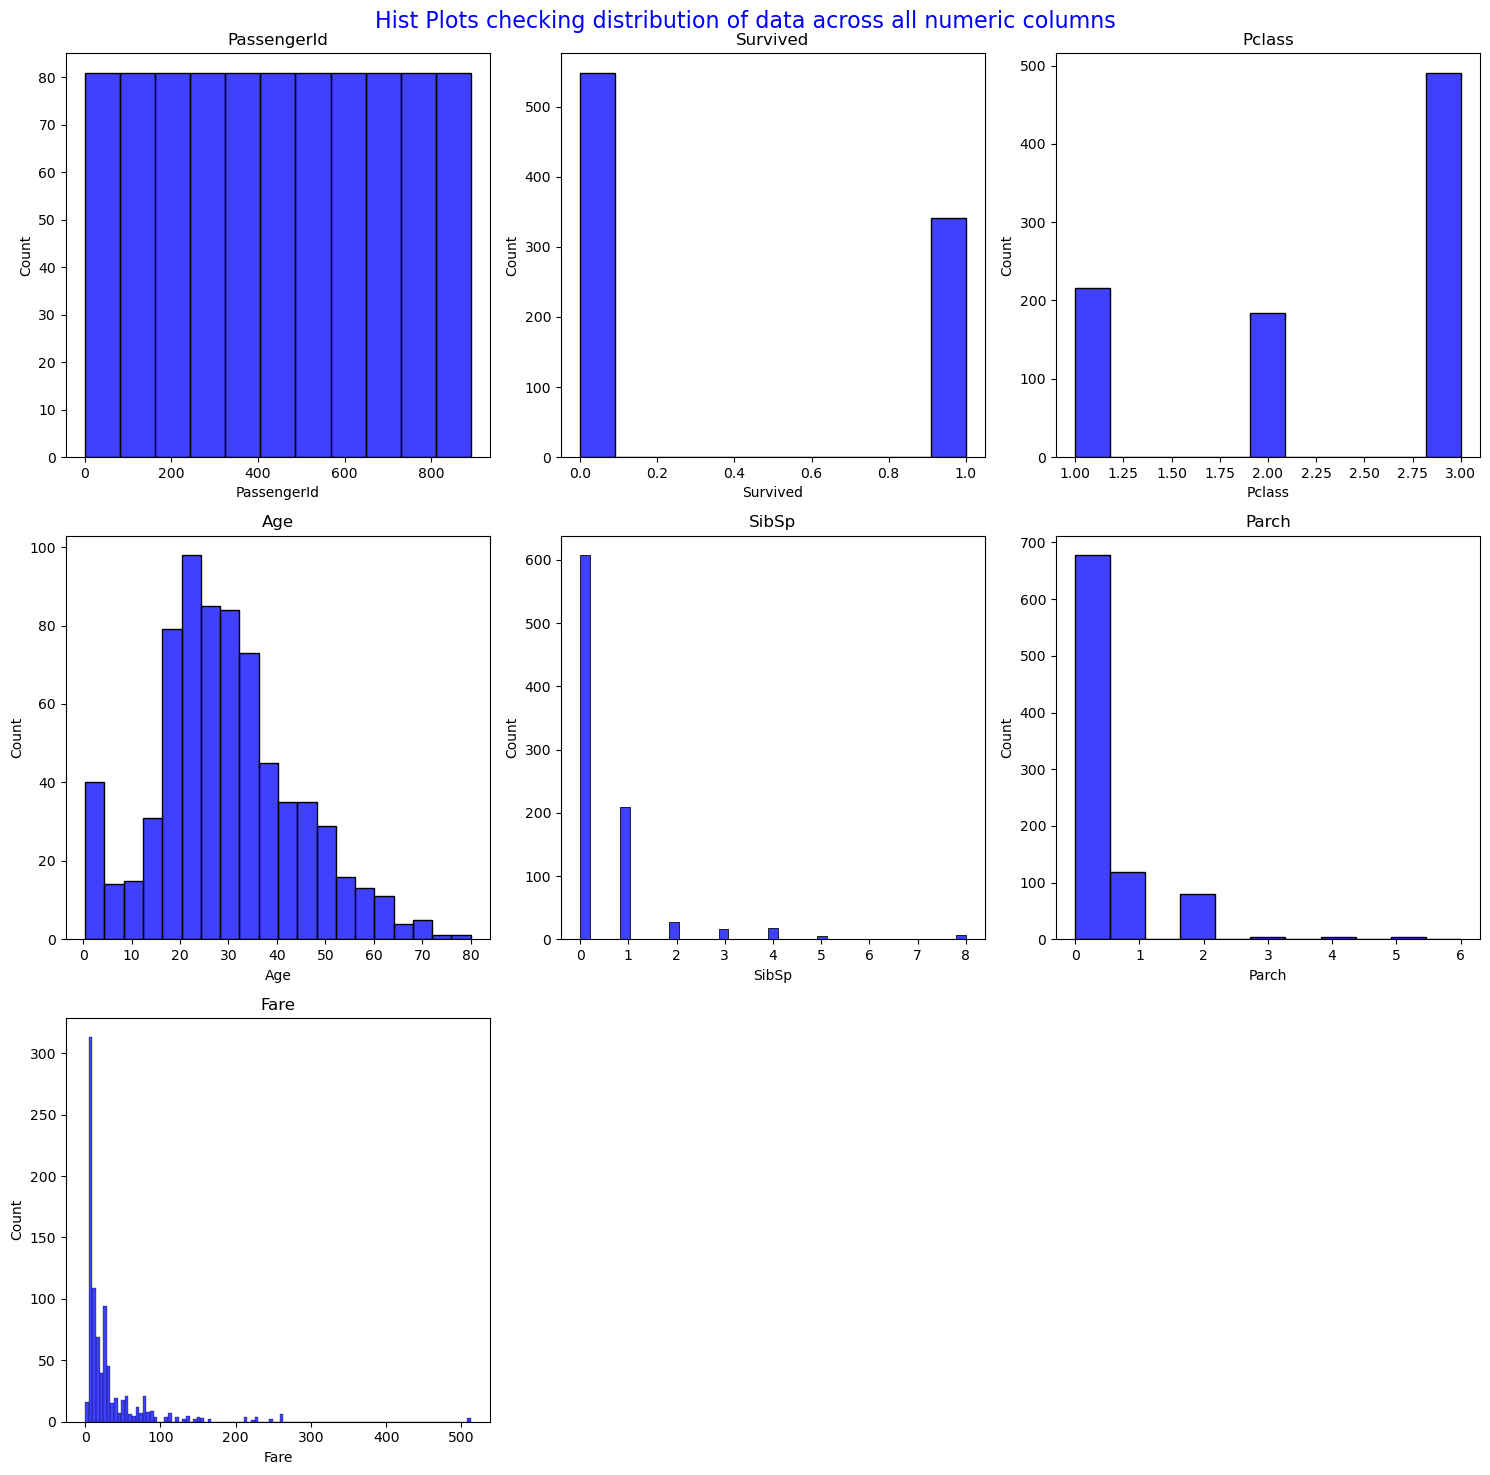

In [46]:
# Let's plot bar plots of numerical columns to understand the distribution of numerical columns

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.histplot(x=train[col], color='blue')         # creating histplot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')
plt.suptitle("Hist Plots checking distribution of data across all numeric columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

We can observe that most of columns seems to be positively skewed.

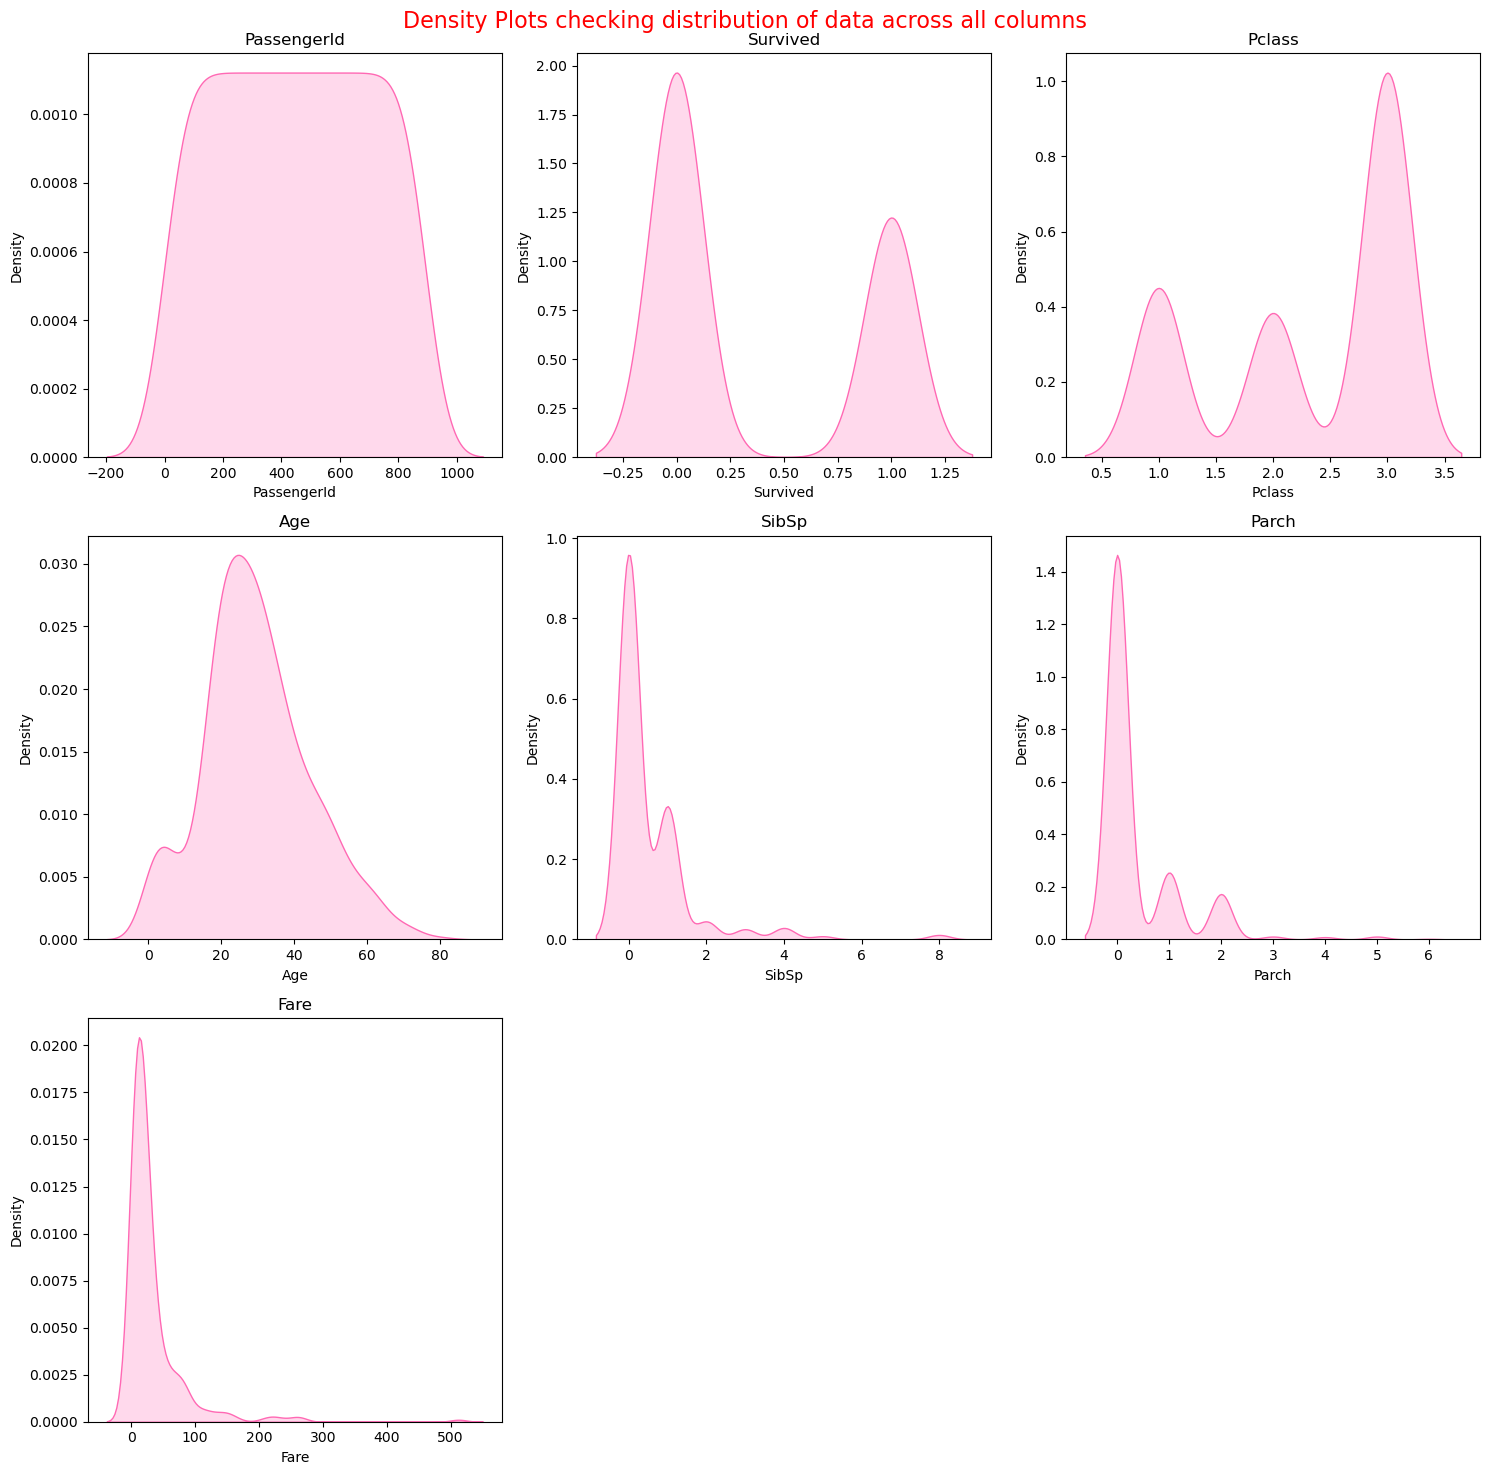

In [28]:
# Let's confirm the above result with the density plot

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:               #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.kdeplot(x=train[col], color='hotpink', fill=True)         # creating density plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(col)
plt.suptitle("Density Plots checking distribution of data across all columns", fontsize=16, color='red')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* We can see features like survived and Sibsp are two tailed
* Features like Pclass, Parch are one tailed
* Features like Fare, Age are one tailed

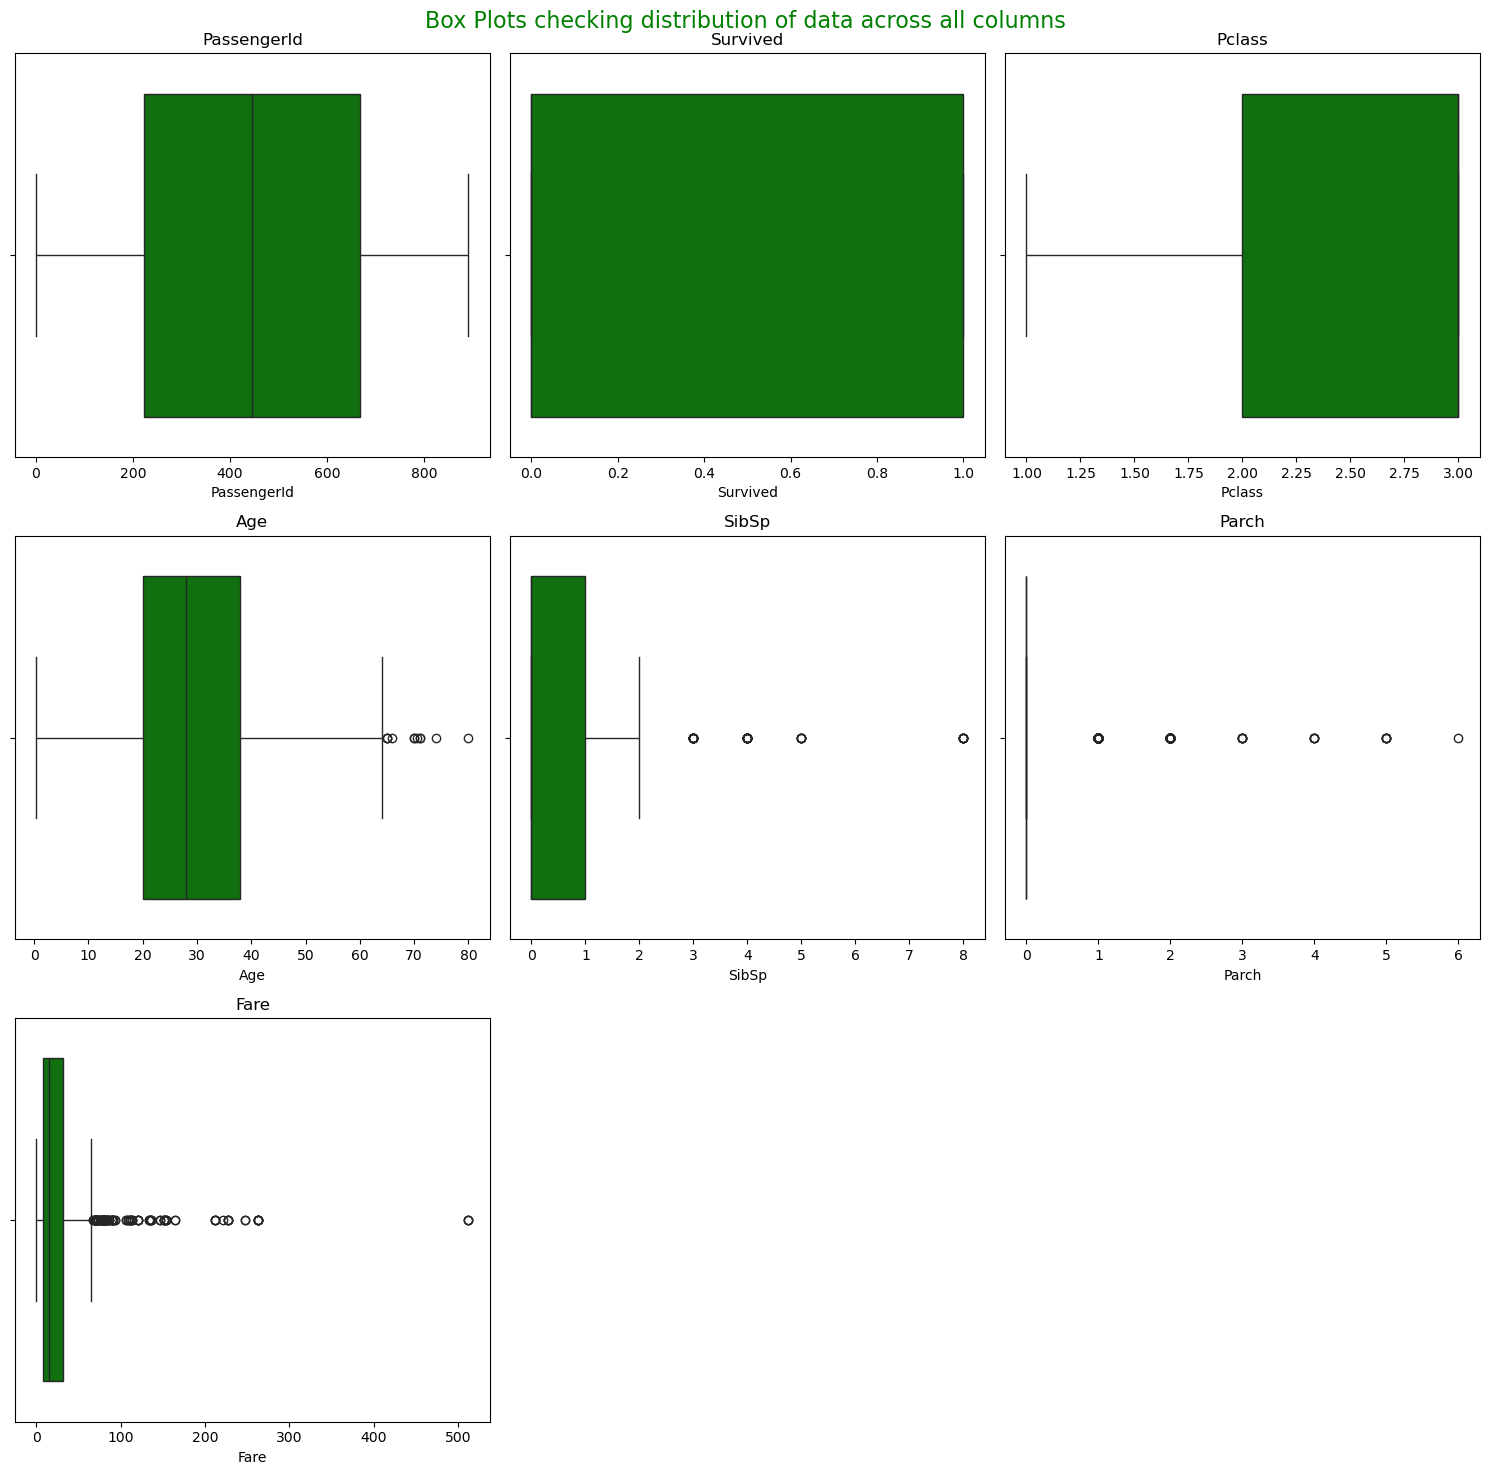

In [30]:
# let's check boxplot of all the numerical columns to better understant the distribution of the data

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.boxplot(x=train[col], color='green')         # creating box plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(col)
plt.suptitle("Box Plots checking distribution of data across all columns", fontsize=16, color='green')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* We have quite a few numbers of outliers.
* **We are assuming that these outliers will not pose a significant threat for the model so we'll retain them.**

#### 4.	Visualize relationships between features and survival using scatter plots and bar plots.

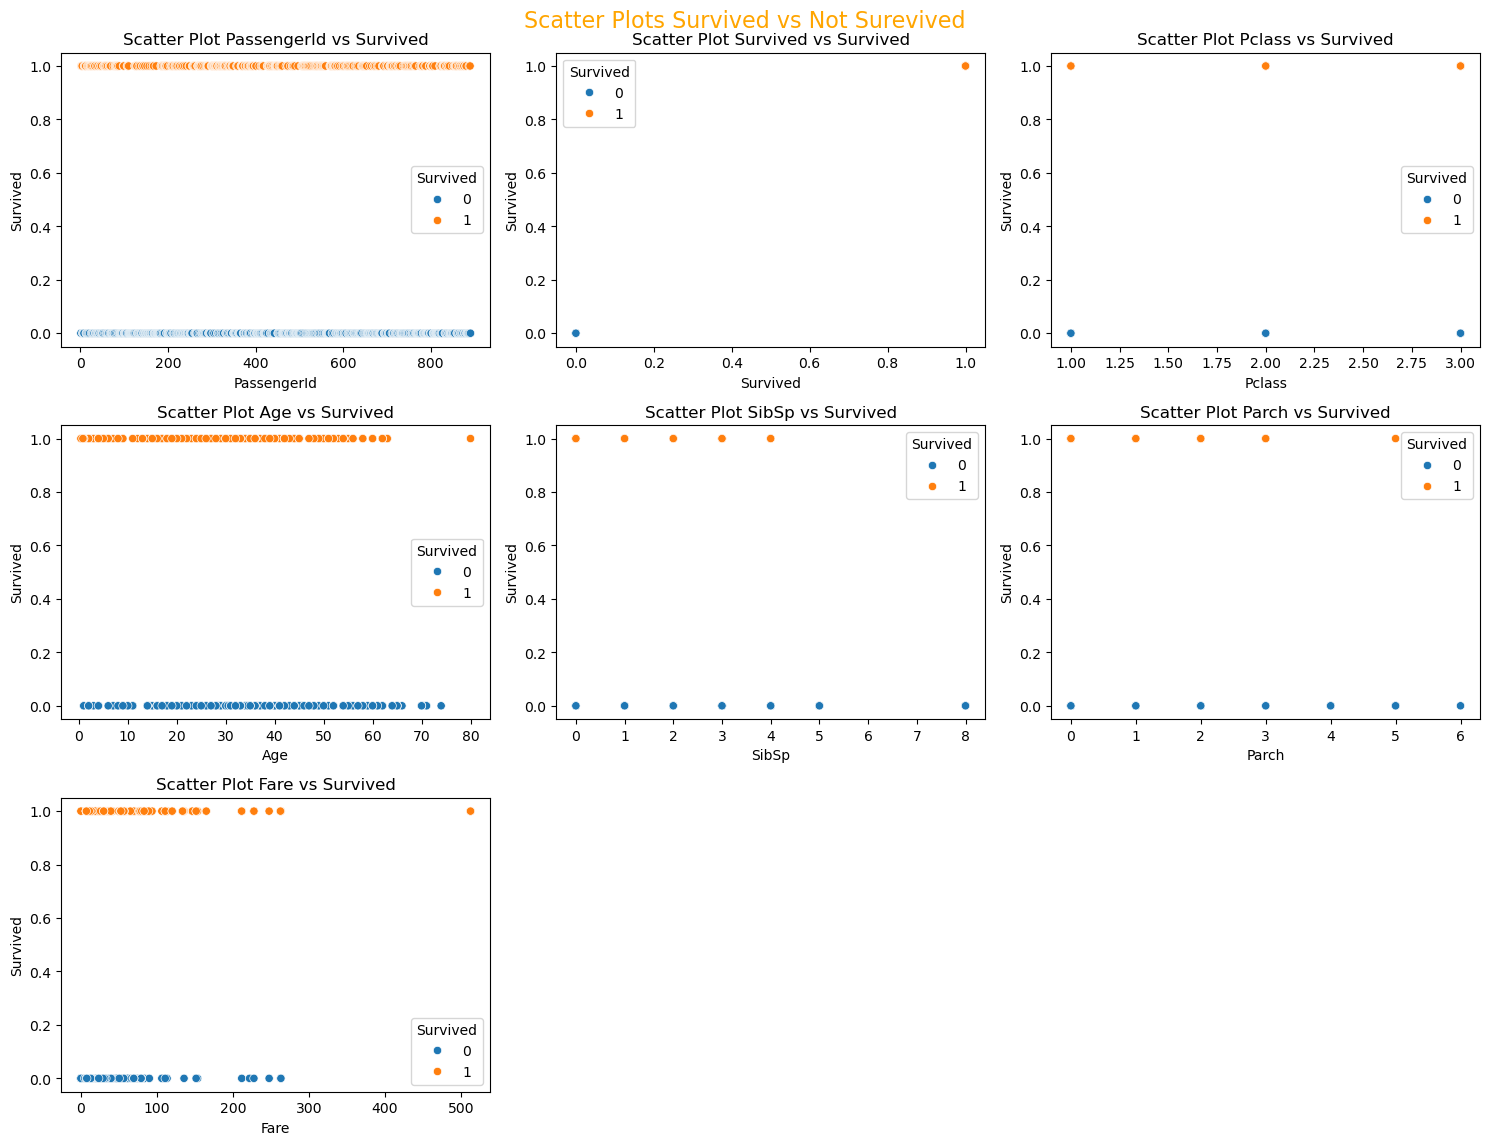

In [34]:
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    sns.scatterplot(x=train[col], y=train['Survived'], hue=train['Survived'])         # creating scatter plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'Scatter Plot {col} vs Survived')
plt.suptitle("Scatter Plots Survived vs Not Surevived", fontsize=16, color='orange')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

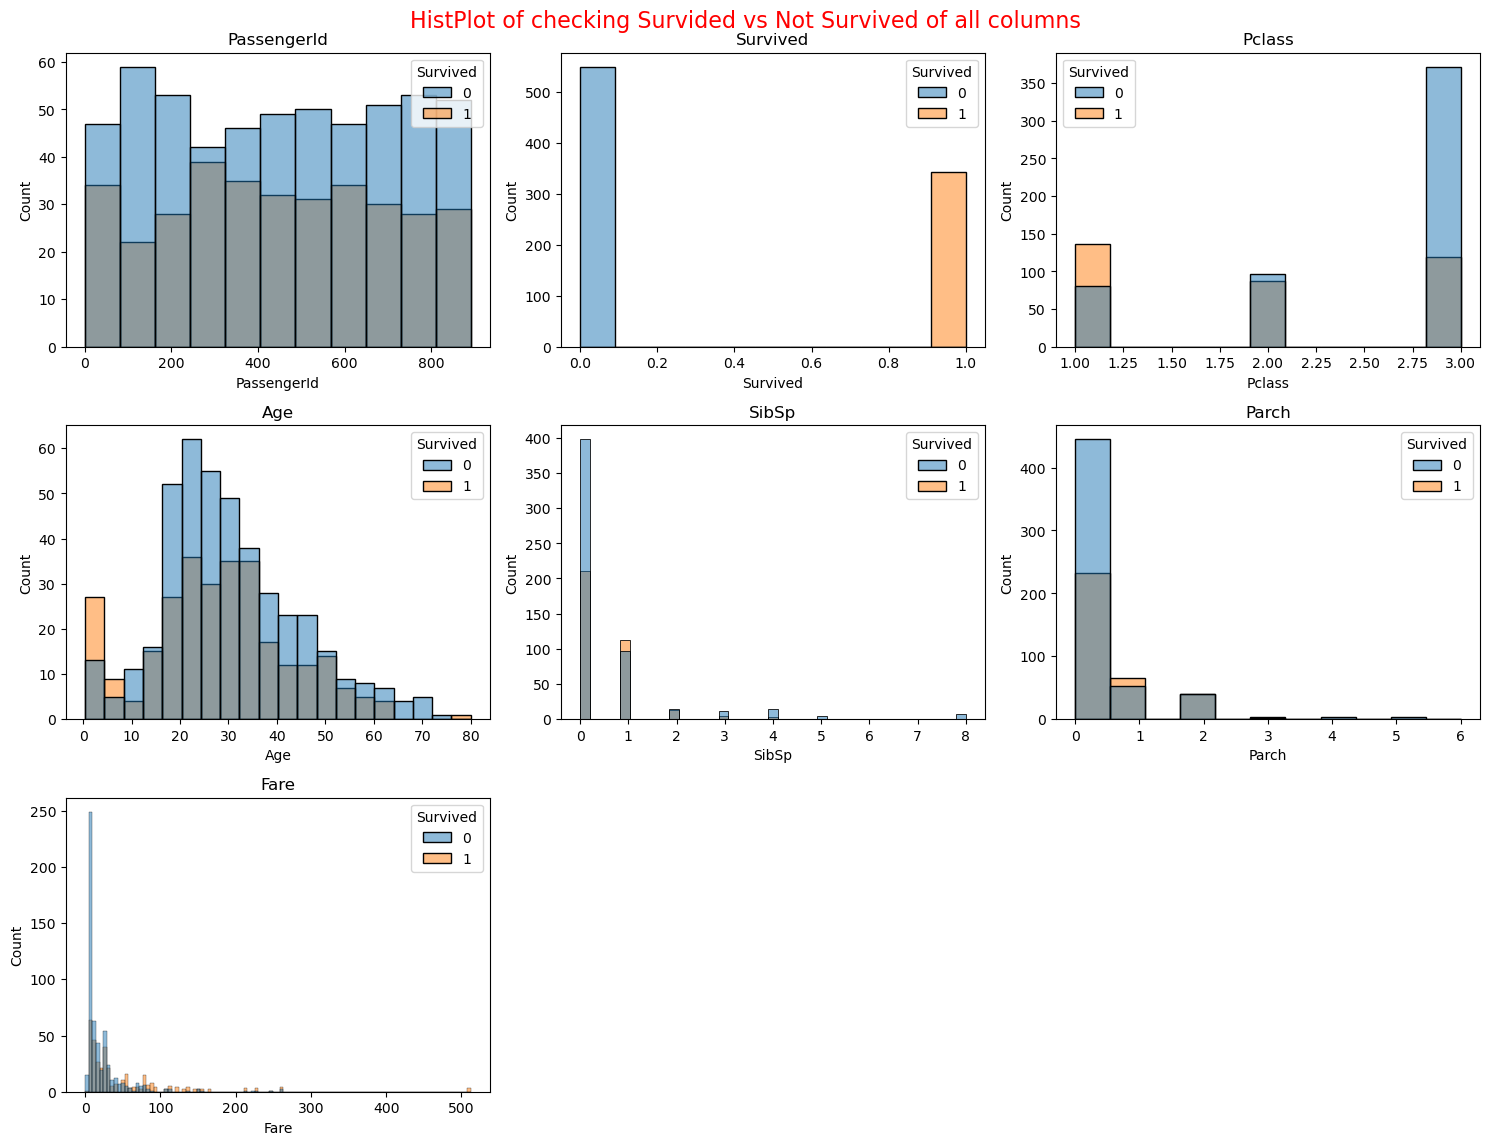

In [44]:
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    sns.histplot(x=train[col], hue=train['Survived'])         # creating comparitive histplot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(col)
plt.suptitle("HistPlot of checking Survided vs Not Survived of all columns", fontsize=16, color='red')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

We can see the variation of whether a person survived or not against all the numerical columns.

#### Data Preprocessing:
##### 1.	Impute missing values.

In [50]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We discussed above we will be:
* Age column has a lot of null values but since age could be an important factor in our prediction of survivors so we'll avoid filling it with any mean value or removing the entire column, instead we'll just remove the rows.
* Cabin has a lot of null values in training and testing set so we'll be removing that column.
* Embarked has only 2 null values and since it's a categorical column we'll be filling it with mode value
* testing set fare value we'll fill with mean value.

In [53]:
#Removing Cabin column from train and test
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
train.shape, test.shape

((891, 11), (418, 10))

In [55]:
#Filling the null values of Embarked and Fare
mod_val = train['Embarked'].mode()[0]           #getting the mode value of embarked column
# The mode value of Embarked column is S.

train['Embarked'].fillna(mod_val)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\peros\AppData\Local\Temp\ipykernel_19612\314439428.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [57]:
# dropping rows with age as null vlaues
train.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

In [59]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


##### 2. Encode categorical variables using one-hot encoding or label encoding. 

In [62]:
train.nunique()

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         541
Fare           219
Embarked         3
dtype: int64

* We cannot convert name into interger because every name is different.
* We will be converting Sex and Embarked
* Ticket is also of object column but it has a lot of unique value so it will be meaningless to convert it into numerical.

In [65]:
#we'll be converting sex and embarked using label encoder in both train and test data
from sklearn.preprocessing import LabelEncoder

encode_cols = ['Sex','Embarked']             #denings the names of the column where we need to convert
for col in encode_cols:                      # running the loop through all the columns defined in the list
    le = LabelEncoder()                      # calling the label encoder method
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

##### 3.	If needed you can apply more preprocessing methods on the given dataset.

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


* This seems to be the most appropriate form for a dataset to be except for the removal of unecessry columns like name and ticket, so we'll stick to this format.
* We could also scale the value if needed and remove the outliers but for this example we are assuming that this is the most optimum data because if remove outliers we may loose a lot of datapoint so we'll stick to this.

In [71]:
#Let's extract relevant features for model training
x = train.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y = train['Survived']
x.shape, y.shape

((712, 7), (712,))

#### Building Predictive Models:
#### 1. Split the preprocessed dataset into training and testing sets.

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((569, 7), (143, 7), (569,), (143,))

#### 2. Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

These are the metrics we'll be using to evaluation of the model.

#### 3. Build predictive models using LightGBM and XGBoost algorithms.

In [81]:
#building xgbclassifier model
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
#building lgbmclassifier model
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model

LGBMClassifier()

#### 4.	Train the models on the training set and evaluate their performance on the testing set.

In [85]:
#training xgbmodel
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
# Let's check the performance of our xgbmodel on testing data
print("Testing Accuracy Score : ",accuracy_score(xgb_model.predict(x_test), y_test))
print("Testing Precision Score : ",precision_score(xgb_model.predict(x_test), y_test))
print("Testing Recall Score : ",recall_score(xgb_model.predict(x_test), y_test))
print("Testing F1 Score : ",f1_score(xgb_model.predict(x_test), y_test))

Testing Accuracy Score :  0.7412587412587412
Testing Precision Score :  0.6507936507936508
Testing Recall Score :  0.7321428571428571
Testing F1 Score :  0.6890756302521008


In [90]:
#training lgbm model
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 225, number of negative: 344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395431 -> initscore=-0.424541
[LightGBM] [Info] Start training from score -0.424541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [92]:
# Let's check the performance of our lgbmodel on testing data
print("Testing Accuracy Score : ",accuracy_score(lgb_model.predict(x_test), y_test))
print("Testing Precision Score : ",precision_score(lgb_model.predict(x_test), y_test))
print("Testing Recall Score : ",recall_score(lgb_model.predict(x_test), y_test))
print("Testing F1 Score : ",f1_score(lgb_model.predict(x_test), y_test))

Testing Accuracy Score :  0.7972027972027972
Testing Precision Score :  0.6984126984126984
Testing Recall Score :  0.8148148148148148
Testing F1 Score :  0.7521367521367521


#### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [95]:
#Implementing Crossvalidation for xgb and lgbm models
from sklearn.model_selection import cross_val_score

xgb_cv_score = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='accuracy')
lgb_cv_score = cross_val_score(lgb_model, x_train, y_train, cv=5, scoring='accuracy')

[LightGBM] [Info] Number of positive: 180, number of negative: 275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395604 -> initscore=-0.423814
[LightGBM] [Info] Start training from score -0.423814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [97]:
print("XGBClassifier CV Accuracy :",xgb_cv_score.mean())
print("LGBMClassifier CV Accuracy :",lgb_cv_score.mean())

XGBClassifier CV Accuracy : 0.7891165968017388
LGBMClassifier CV Accuracy : 0.7996584381307251


In [99]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'n_estimators':[50, 100, 200],
    'max_depth':[3, 5, 7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0]
}

#xgb with GridSearchCV
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, scoring='accuracy', cv=5, verbose=1)
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for XGBClassifier : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross Validation Accuracy : 0.8260363297624593


C:\Users\peros\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [101]:
#Finding best params score for xgb using GridSearchCV
print('Best Parameters for XGBClassifier :', xgb_grid.best_params_)
print('Best Cross Validation Accuracy :', xgb_grid.best_score_)

Best Parameters for XGBClassifier : {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross Validation Accuracy : 0.8260363297624593


In [109]:
# GridSearchCV was taking a lot of time to process for LGBM so we'll be implementing hyperparamete tuning usin RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

#defining parameters
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 50],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#defining model
lgbm = LGBMClassifier(random_state=42)

# LGBMClassifier implmenting using Random Search CV
lgbm_random = RandomizedSearchCV(estimator=lgbm, param_distributions=lgbm_param_grid, 
                                n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
lgbm_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 180, number of negative: 275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395604 -> initscore=-0.423814
[LightGBM] [Info] Start training from score -0.423814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [20, 31, 50],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [113]:
#Finding best params score
print('Best Parameters for LGBMClassifier (RandomizedSearchCV):', lgbm_random.best_params_)
print('Best Cross Validation Accuracy :', lgbm_random.best_score_)

Best Parameters for LGBMClassifier (RandomizedSearchCV): {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best Cross Validation Accuracy : 0.8189877348237851


In [117]:
# Let's check the accuracy of best models

xgb_best = xgb_grid.best_estimator_
lgbm_best = lgbm_random.best_estimator_

xgb_test_accuracy = xgb_best.score(x_test, y_test)
lgbm_test_accuracy = lgbm_best.score(x_test, y_test)

print("XGBClassifier Best Model Score:", xgb_test_accuracy)
print("LGBMClassifier Best Model Score:", lgbm_test_accuracy)

XGBClassifier Best Model Score: 0.8111888111888111
LGBMClassifier Best Model Score: 0.8111888111888111


#### Accuracy Scores of all the models

**Default Models Accuracy**
* Normal XGBClassifier Accuracy Score: 0.7972027972027972
* Normal LGBMClassifier Accuracy Score: 0.7902097902097902

**Cross Validation Scores**
* XGBClassifier CV Accuracy : 0.807353165522502
* LGBMClassifier CV Accuracy : 0.817864225781846

**Tuned Model Accuracy**
* XGBClassifier Test Accuracy: 0.7902097902097902
* LGBMClassifier Test Accuracy: 0.7972027972027972

There's not much difference even after hyperparameter tuning meaning the the default model chosen is the best model

#### Comparative Analysis:
#### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

**Accuracy of XGBClassifier**
* Testing Accuracy Score :  0.7972027972027972
* Testing Precision Score :  0.6964285714285714
* Testing Recall Score :  0.7647058823529411
* Testing F1 Score :  0.7289719626168224

**Accuracy of LGBMClassifier**
* Testing Accuracy Score :  0.7902097902097902
* Testing Precision Score :  0.6964285714285714
* Testing Recall Score :  0.75
* Testing F1 Score :  0.7222222222222222

#### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

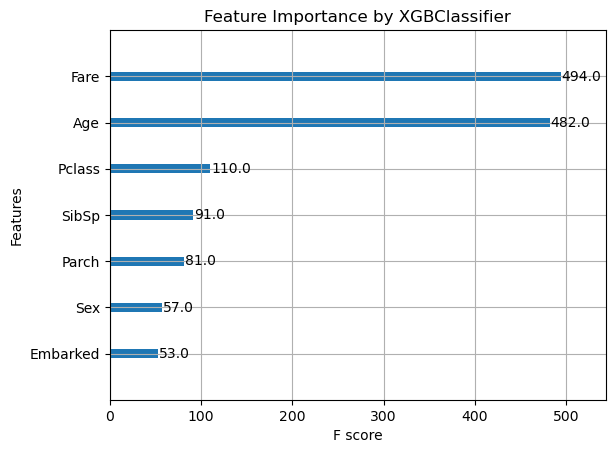

In [124]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_best)
plt.title("Feature Importance by XGBClassifier")
plt.xlabel
plt.show()

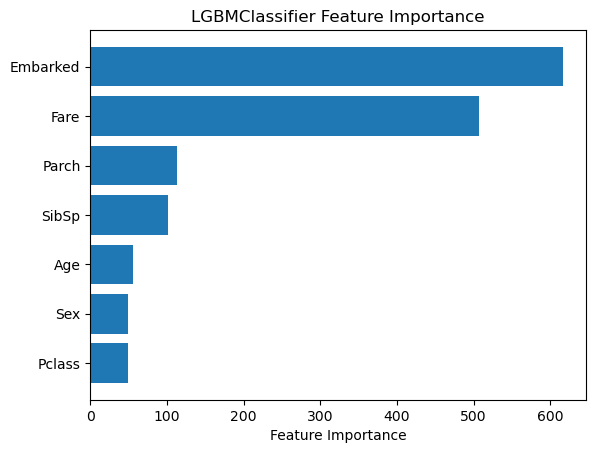

In [126]:
import matplotlib.pyplot as plt

importances = np.sort(lgbm_best.feature_importances_)
plt.barh(x.columns, importances)
plt.xlabel('Feature Importance')
plt.title('LGBMClassifier Feature Importance')
plt.show()

In [132]:
# Note: Observed Feature importance and Accuray score may change slightly depending on the kernel because of random_state we choose earlier.

**We can observe here several things:**
* Most important feature for xgb is Age where as for lgbm it is Embarked
* Fare is the next important factor for both xgb and lgbm
* Parch is given the least priority in xgb where as in lgbm Pclass is considered the least important feature
* There quite dfference in the learning of both the models, although they both yield same type of result in the end their baisis of learning and working is very different.


* **Strengths of Each Model:**

**XGBClassifier:**

* May excel in datasets with complex non-linear relationships due to its handling of gradient boosting.
* Slightly more robust to overfitting when properly tuned.

**LGBMClassifier:**

* Often faster in training and prediction due to its use of histogram-based learning.
* Performs well with large datasets and categorical features.
* **Weaknesses of Each Model:**

**XGBClassifier:**

* Tends to be slower compared to LightGBM, especially for large datasets.
* Sensitive to hyperparameter tuning for optimal performance.

**LGBMClassifier:**

* May underperform if the dataset is small or lacks sufficient features for its histogram-based splits.
* Slightly more sensitive to imbalanced datasets without proper sampling or weighting.

**Practical Implications**
* When to Use XGBClassifier?

  * Ideal for small to medium-sized datasets with complex non-linear patterns.
  * Suitable when training time is less critical, and the focus is on maximizing performance with proper hyperparameter tuning.

* When to Use LGBMClassifier?

  * Best for large datasets or when computational efficiency is a priority.
  * Particularly useful for datasets with categorical features and cases where speed is critical.

**Conclusion**
* The LGBMClassifier emerges as a slightly better model in this comparison due to its marginally higher accuracy and faster training time, making it more practical for real-world applications.
* However, the XGBClassifier remains a strong alternative, especially for datasets requiring intricate pattern recognition.
* The choice of the model ultimately depends on the specific requirements of the task, such as the importance of computational efficiency, dataset size, and the need for interpretability.